# Tomato Leaf Disease Classification

In [44]:
!pip install matplotlib

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [46]:
img_height, img_width = 256, 256  # Maintain original resolution
batch_size = 32
num_classes = 10

In [47]:
train_dir = 'dataset/train'
val_dir = 'dataset/val'

In [48]:
# Efficient Data Loading
AUTOTUNE = tf.data.experimental.AUTOTUNE

def preprocess(image, label):
    image = tf.image.resize(image, [img_height, img_width])
    image = image / 255.0  # Normalize to [0, 1]
    return image, label

#training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    label_mode='categorical'  # Use categorical labels
).map(preprocess).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

#validation dataset
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    label_mode='categorical'  # Use categorical labels
).map(preprocess).cache().prefetch(buffer_size=AUTOTUNE)

Found 10000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


In [49]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),

    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,194 (129.66 KB)

 Trainable params: 33,194 (129.66 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Callbacks
callbacks = [
    EarlyStopping(patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True, verbose=1)
]


history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks=callbacks
)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.1922 - loss: 2.0995
Epoch 1: val_loss improved from inf to 1.60449, saving model to best_model.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 331ms/step - accuracy: 0.1924 - loss: 2.0988 - val_accuracy: 0.3630 - val_loss: 1.6045
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.4300 - loss: 1.5269
Epoch 2: val_loss improved from 1.60449 to 1.31291, saving model to best_model.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 101s 323ms/step - accuracy: 0.4301 - loss: 1.5267 - val_accuracy: 0.5300 - val_loss: 1.3129
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.5003 - loss: 1.3434
Epoch 3: val_loss improved from 1.31291 to 1.11570, saving model to best_model.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 85s 271ms/step - accuracy: 0.5003 - loss: 1.3433 - val_accuracy: 0.6160 - val_loss: 1.1157
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.5659 - loss: 1.1707
Epoch 4: val_loss improved from 1.1

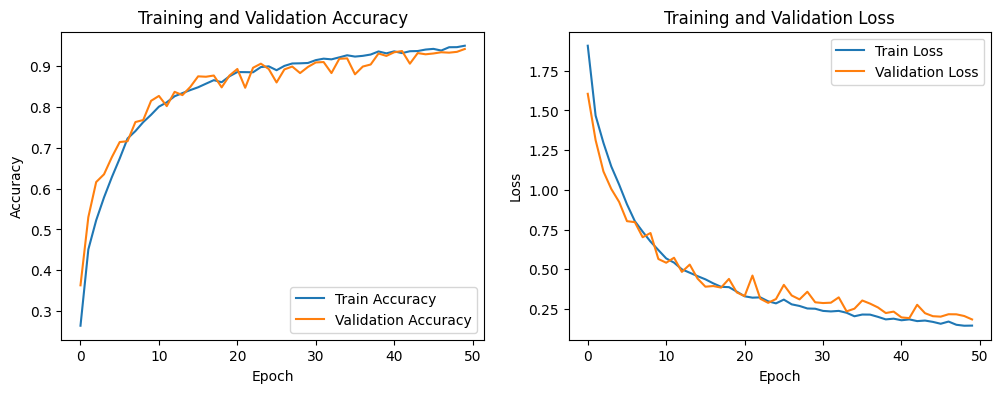

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

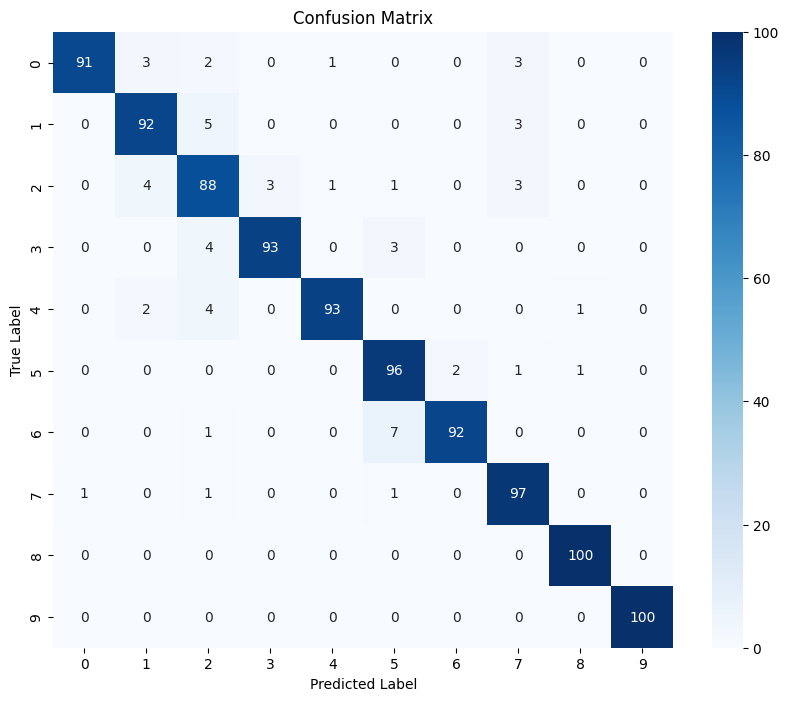

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming history is your training history object
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.savefig('training_validation_accuracy.png')  # Save the accuracy plot

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.savefig('training_validation_loss.png')  # Save the loss plot

plt.show()

# Confusion Matrix
val_labels = []
val_preds = []

for images, labels in val_dataset:
    val_labels.extend(np.argmax(labels.numpy(), axis=1))
    val_preds.extend(np.argmax(model.predict(images), axis=1))

conf_matrix = confusion_matrix(val_labels, val_preds)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')  # Save the confusion matrix plot

plt.show()

In [41]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score

# Evaluate on validation dataset
val_loss, val_acc = model.evaluate(val_dataset)
print(f"Validation accuracy: {val_acc:.2f}")

# Get the true labels and predictions
val_labels = []
val_predictions = []

for images, labels in val_dataset:
    preds = model.predict(images)
    val_predictions.extend(np.argmax(preds, axis=1))
    val_labels.extend(np.argmax(labels.numpy(), axis=1))

# Compute precision, recall, and F1 score
val_precision = precision_score(val_labels, val_predictions, average='weighted')
val_recall = recall_score(val_labels, val_predictions, average='weighted')
val_f1 = f1_score(val_labels, val_predictions, average='weighted')

print(f"Validation Precision: {val_precision:.2f}")
print(f"Validation Recall: {val_recall:.2f}")
print(f"Validation F1 score: {val_f1:.2f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9403 - loss: 0.1842
Validation accuracy: 0.94
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 

In [42]:
model.save('light_tomato.h5')

In [43]:
import os
import random
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('light_tomato.h5')

# Path to the validation directory
val_dir = 'dataset/val'

# Get list of disease folders
disease_folders = os.listdir(val_dir)

# Class names
class_names = {
    0: 'bacterial spot',
    1: 'early blight',
    2: 'late blight',
    3: 'leaf mold',
    4: 'Septoria',
    5: 'spider mites',
    6: 'target spot',
    7: 'yellow leaf',
    8: 'mosaic',
    9: 'healthy'
}

# Iterate 10 times
for _ in range(10):
    print(f"Iteration {_ + 1}:")
    # Choose a random disease folder
    random_folder_name = random.choice(disease_folders)
    # Get list of images in the random disease folder
    images = os.listdir(os.path.join(val_dir, random_folder_name))
    # Choose a random image from the folder
    random_image = random.choice(images)
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(
        os.path.join(val_dir, random_folder_name, random_image),
        target_size=(img_height, img_width)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    img_array = img_array / 255.0  # Normalize
    # Predict disease label using the model
    predictions = model.predict(img_array)
    predicted_label = predictions.argmax(axis=-1)[0]
    # Update class_names dictionary if predicted_label is not in the dictionary
    if predicted_label not in class_names:
        class_names[predicted_label] = f'Class {predicted_label}'
    # Get the class name from the folder name
    actual_label = random_folder_name.split('___')[-1]
    # Print the predicted label and actual label
    print(f"Predicted: {class_names[predicted_label]}, Actual: {actual_label}")
    print()

Iteration 1:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Predicted: bacterial spot, Actual: Bacterial_spot

Iteration 2:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted: leaf mold, Actual: Leaf_Mold

Iteration 3:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted: spider mites, Actual: Spider_mites Two-spotted_spider_mite

Iteration 4:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted: Septoria, Actual: Septoria_leaf_spot

Iteration 5:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted: healthy, Actual: healthy

Iteration 6:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted: target spot, Actual: Target_Spot

Iteration 7:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted: late blight, Actual: Late_blight

Iteration 8:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted: mosaic, Actual: Tomato_mosaic_virus

Iteration 9:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted: healthy, Actual: healthy

Iteration 10:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted: bacterial spot, Actual: Bacterial_spot

